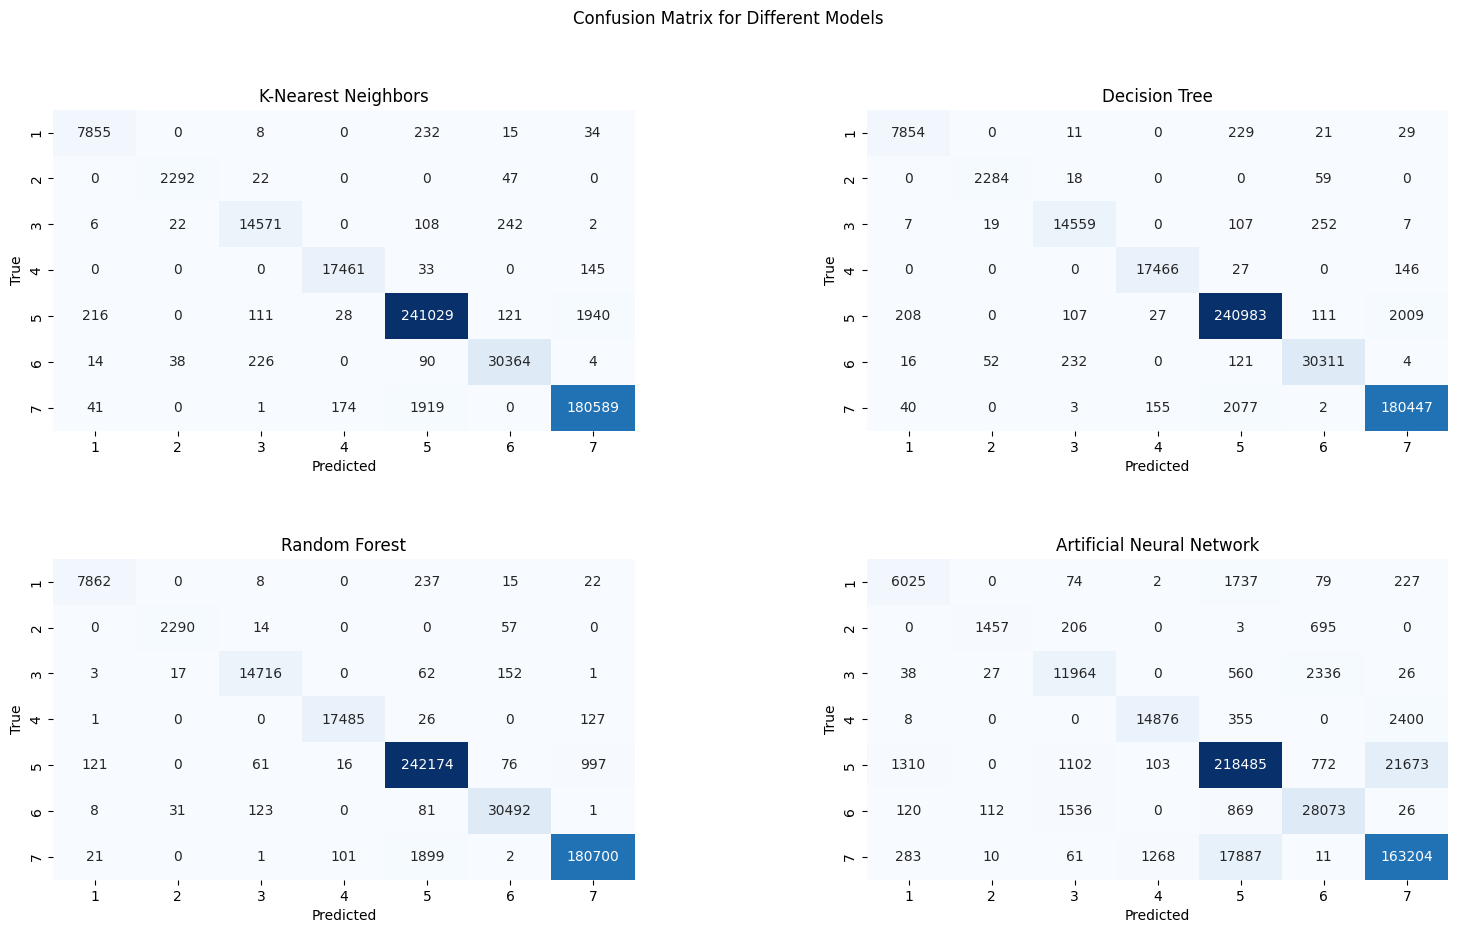

In [143]:
# Tạo confusion matrix cho từng mô hình
knn_cm = confusion_matrix(Y_PRE, knn_predictions)
decision_tree_cm = confusion_matrix(Y_PRE, decision_tree_predictions)
random_forest_cm = confusion_matrix(Y_PRE, random_forest_predictions)
ann_cm = confusion_matrix(Y_PRE, ann_predictions)

# Tạo DataFrame từ confusion matrix
knn_cm_df = pd.DataFrame(knn_cm, index=range(1, 8), columns=range(1, 8))
decision_tree_cm_df = pd.DataFrame(decision_tree_cm, index=range(1, 8), columns=range(1, 8))
random_forest_cm_df = pd.DataFrame(random_forest_cm, index=range(1, 8), columns=range(1, 8))
ann_cm_df = pd.DataFrame(ann_cm, index=range(1, 8), columns=range(1, 8))

# Vẽ confusion matrix sử dụng seaborn
plt.figure(figsize=(18, 10))  # Thay đổi kích thước của toàn bộ biểu đồ
plt.suptitle('Confusion Matrix for Different Models')

plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Tăng margin giữa các biểu đồ

plt.subplot(2, 2, 1)
sns.heatmap(knn_cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("K-Nearest Neighbors")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2, 2, 2)
sns.heatmap(decision_tree_cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2, 2, 3)
sns.heatmap(random_forest_cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2, 2, 4)
sns.heatmap(ann_cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Artificial Neural Network")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

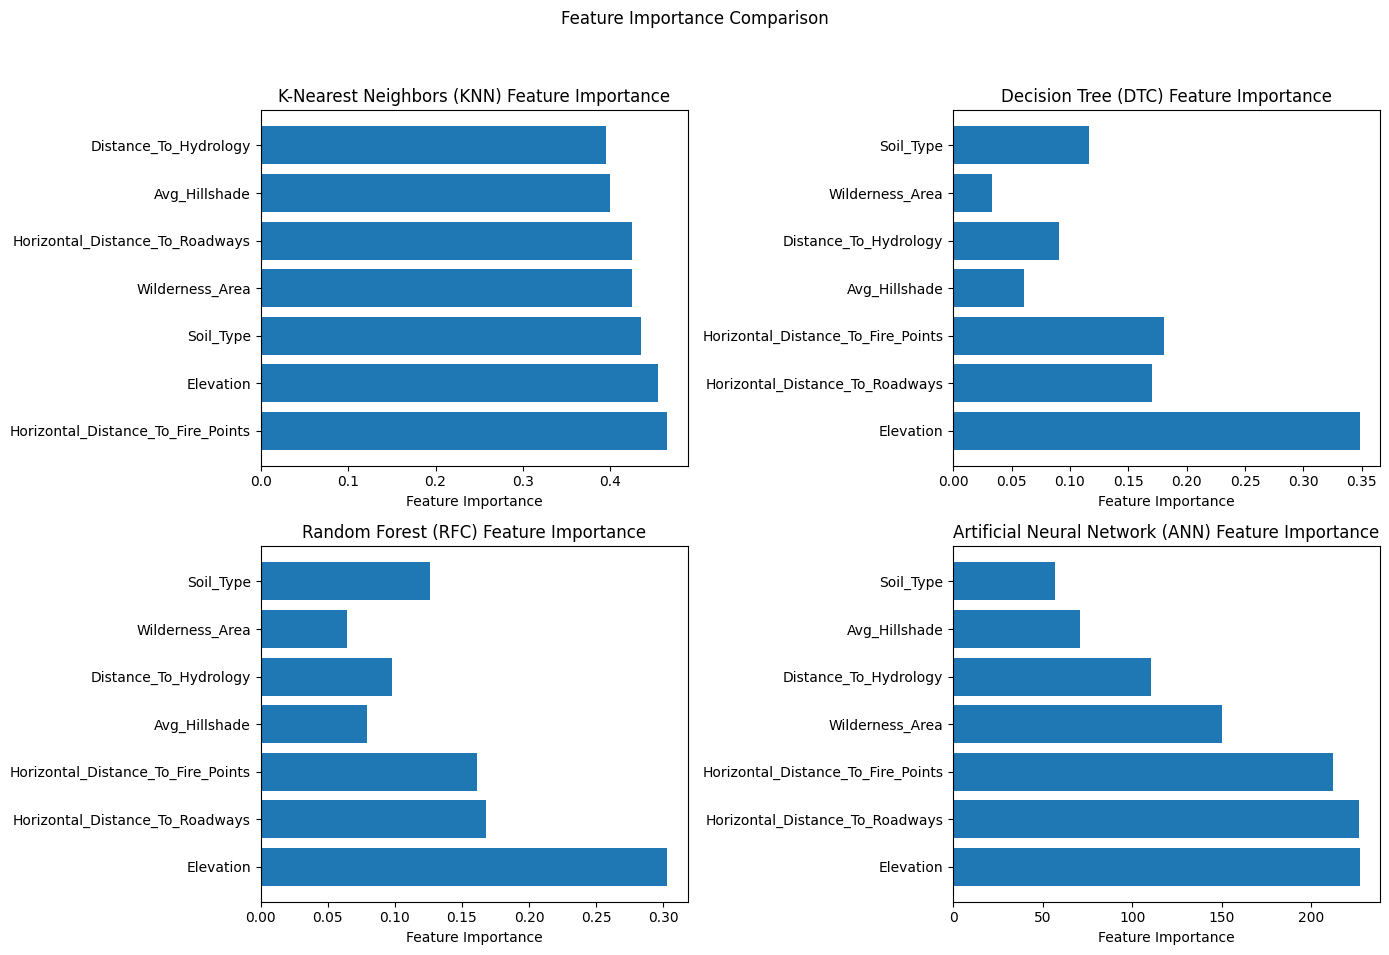

In [236]:
# Create subplots for each model's feature importance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Importance Comparison')

# 1. K-Nearest Neighbors (KNN) Model
# Tạo danh sách để lưu trữ độ quan trọng của từng đặc trưng
feature_importance = []

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_PRE, Y_PRE, test_size=0.2, random_state=42)

# Đánh giá hiệu suất mô hình gốc
y_pred = KNN_Model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)

# Lặp qua từng đặc trưng để tính độ quan trọng
for feature in X_train.columns:
    X_train_temp = X_train.drop(feature, axis=1)
    X_test_temp = X_test.drop(feature, axis=1)
    
    # Tạo mô hình KNN tạm thời sau khi loại bỏ đặc trưng
    knn_temp = KNeighborsClassifier(n_neighbors=KNN_Model.n_neighbors)  # Tạo một mô hình mới
    knn_temp.fit(X_train_temp, y_train)
    
    # Đánh giá hiệu suất sau khi loại bỏ đặc trưng
    y_pred_temp = knn_temp.predict(X_test_temp)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    
    # Độ quan trọng của đặc trưng được tính bằng sự thay đổi trong hiệu suất
    feature_importance.append(baseline_accuracy - accuracy_temp)

# Sắp xếp độ quan trọng của đặc trưng và tên đặc trưng tương ứng
knn_importances, knn_features = zip(*sorted(zip(feature_importance, X_train.columns), reverse=True))


axes[0, 0].barh(range(len(knn_features)), knn_importances, align='center')
axes[0, 0].set_yticks(range(len(knn_features)))
axes[0, 0].set_yticklabels(knn_features)
axes[0, 0].set_xlabel('Feature Importance')
axes[0, 0].set_title('K-Nearest Neighbors (KNN) Feature Importance')

# 2. Decision Tree (DTC) Model
dtc_feature_importances = DTC_Model.feature_importances_
dtc_feature_names = X_PRE.columns

axes[0, 1].barh(range(len(dtc_feature_names)), dtc_feature_importances, align='center')
axes[0, 1].set_yticks(np.arange(len(dtc_feature_names)))
axes[0, 1].set_yticklabels(dtc_feature_names)
axes[0, 1].set_xlabel('Feature Importance')
axes[0, 1].set_title('Decision Tree (DTC) Feature Importance')

# 3. Random Forest (RFC) Model
rfc_feature_importances = RFC_Model.feature_importances_
rfc_feature_names = X_PRE.columns

axes[1, 0].barh(range(len(rfc_feature_names)), rfc_feature_importances, align='center')
axes[1, 0].set_yticks(np.arange(len(rfc_feature_names)))
axes[1, 0].set_yticklabels(rfc_feature_names)
axes[1, 0].set_xlabel('Feature Importance')
axes[1, 0].set_title('Random Forest (RFC) Feature Importance')

# 4. Artificial Neural Network (ANN) Model
input_layer_weights = ANN_model.layers[0].get_weights()[0]
ann_feature_importances = np.sum(np.abs(input_layer_weights), axis=1)
ann_feature_names = X_PRE.columns

sorted_ann_feature_importances, sorted_ann_feature_names = zip(*sorted(zip(ann_feature_importances, ann_feature_names), reverse=True))

axes[1, 1].barh(range(len(sorted_ann_feature_names)), sorted_ann_feature_importances, align='center')
axes[1, 1].set_yticks(range(len(sorted_ann_feature_names)))
axes[1, 1].set_yticklabels(sorted_ann_feature_names)
axes[1, 1].set_xlabel('Feature Importance')
axes[1, 1].set_title('Artificial Neural Network (ANN) Feature Importance')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()